<h4>Team Mates:</h4>
<p>Yadava Krishnaa P - CB.EN.U4CSE20072</p>
<P>Dommeti Surya Vamsi - CB.EN.U4CSE20019</P>
<p>Badana Tarun - CB.EN.U4CSE20011</p>

<p>Time Series Dataset - Microsoft_Stock.csv</p>
<p>Text Analytics - plot_summaries.txt </p>

<h2>Time Series - CS3</h2>

# Data Preprocessing

In [30]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
%matplotlib inline

# Load the dataset
data = pd.read_csv("Microsoft_Stock.csv")

data


,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [16]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [18]:
data.shape

(1511, 6)

In [19]:
data.set_index("Date",inplace=True)

In [20]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34,34061853
2021-03-26 16:00:00,231.55,236.71,231.55,236.48,25479853
2021-03-29 16:00:00,236.59,236.80,231.88,235.24,25227455


In [21]:
data.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [22]:
data.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


# Data Visualizataion

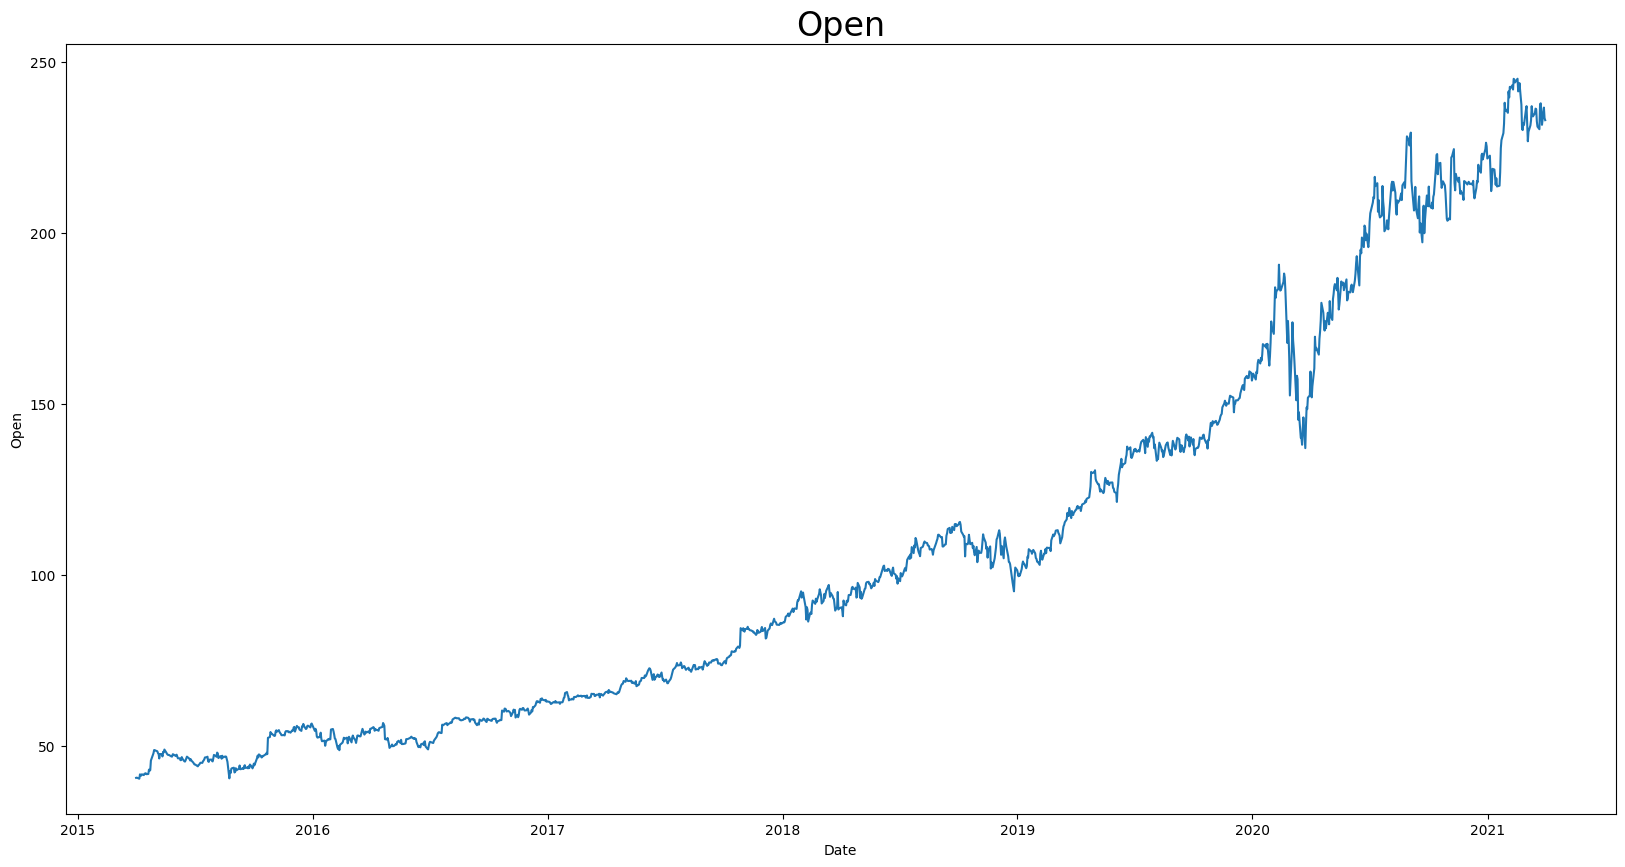

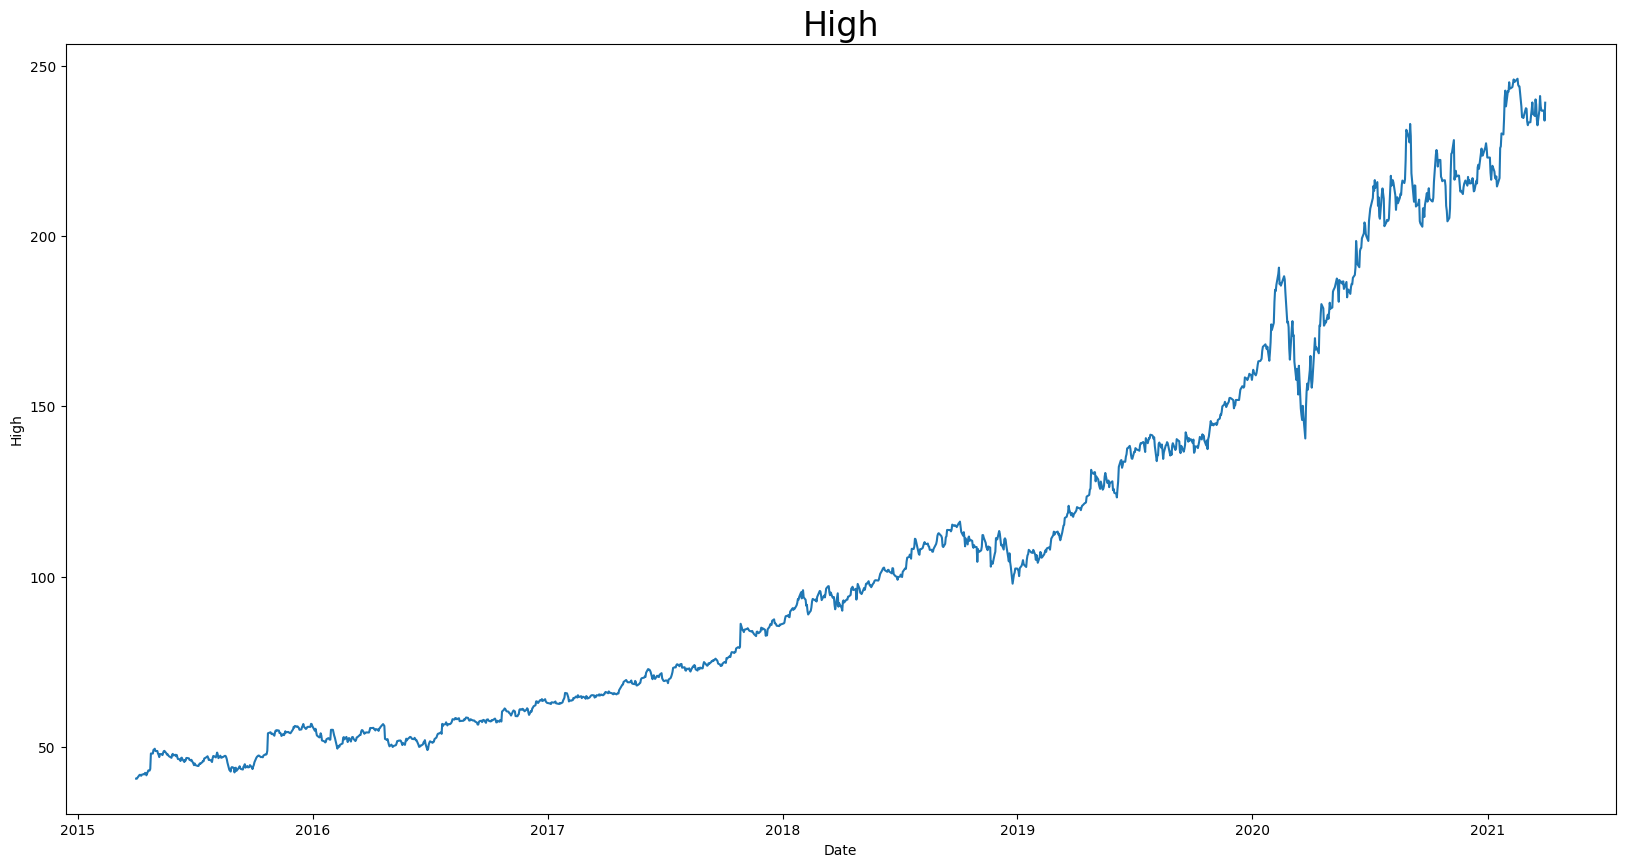

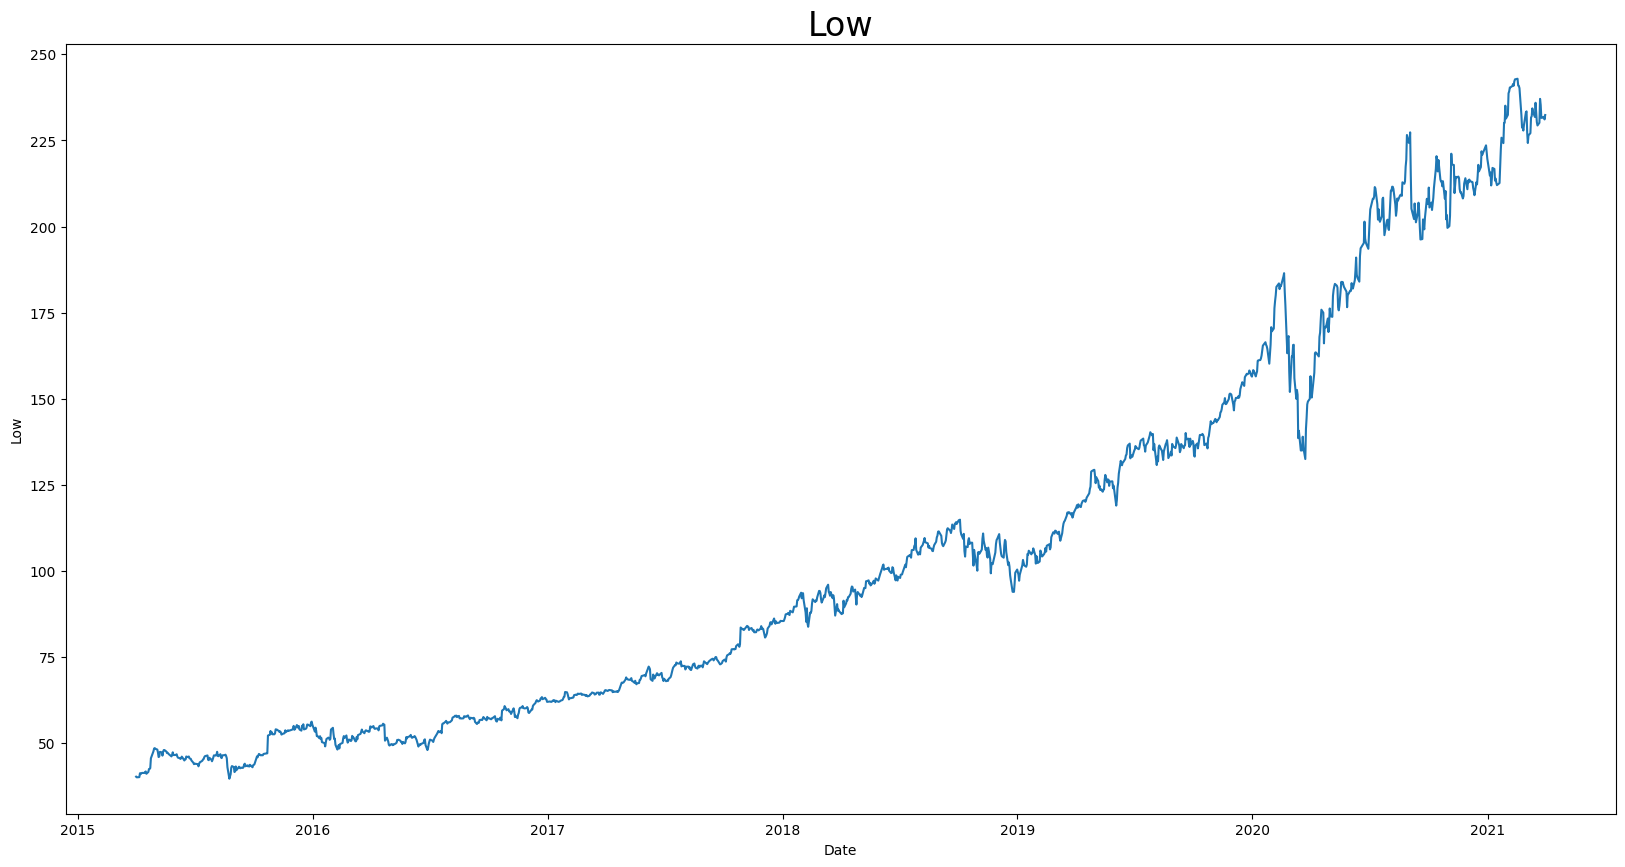

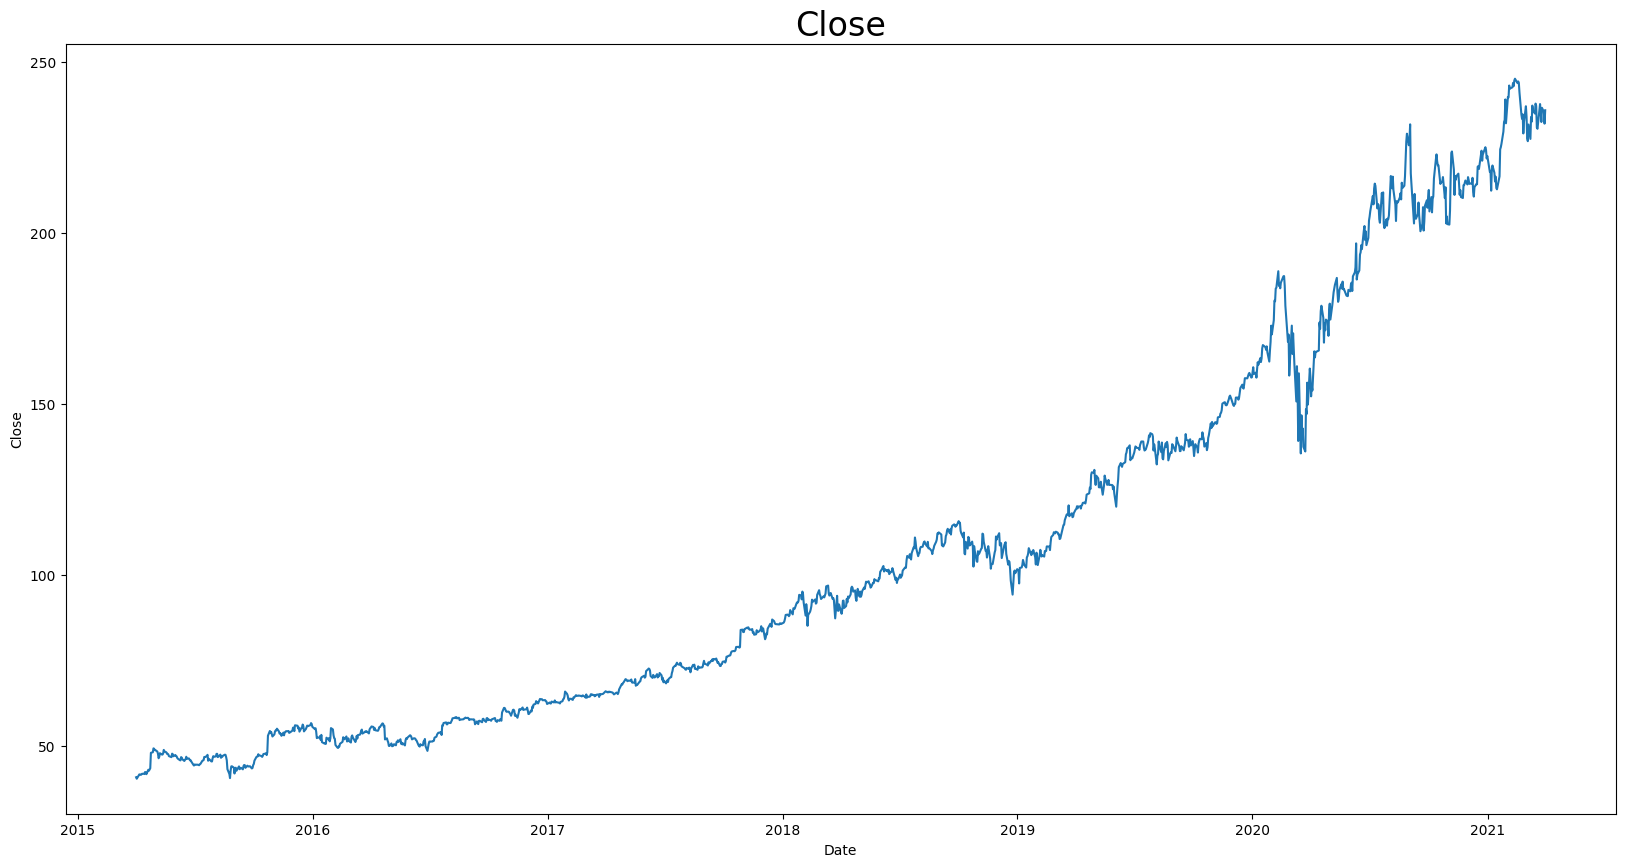

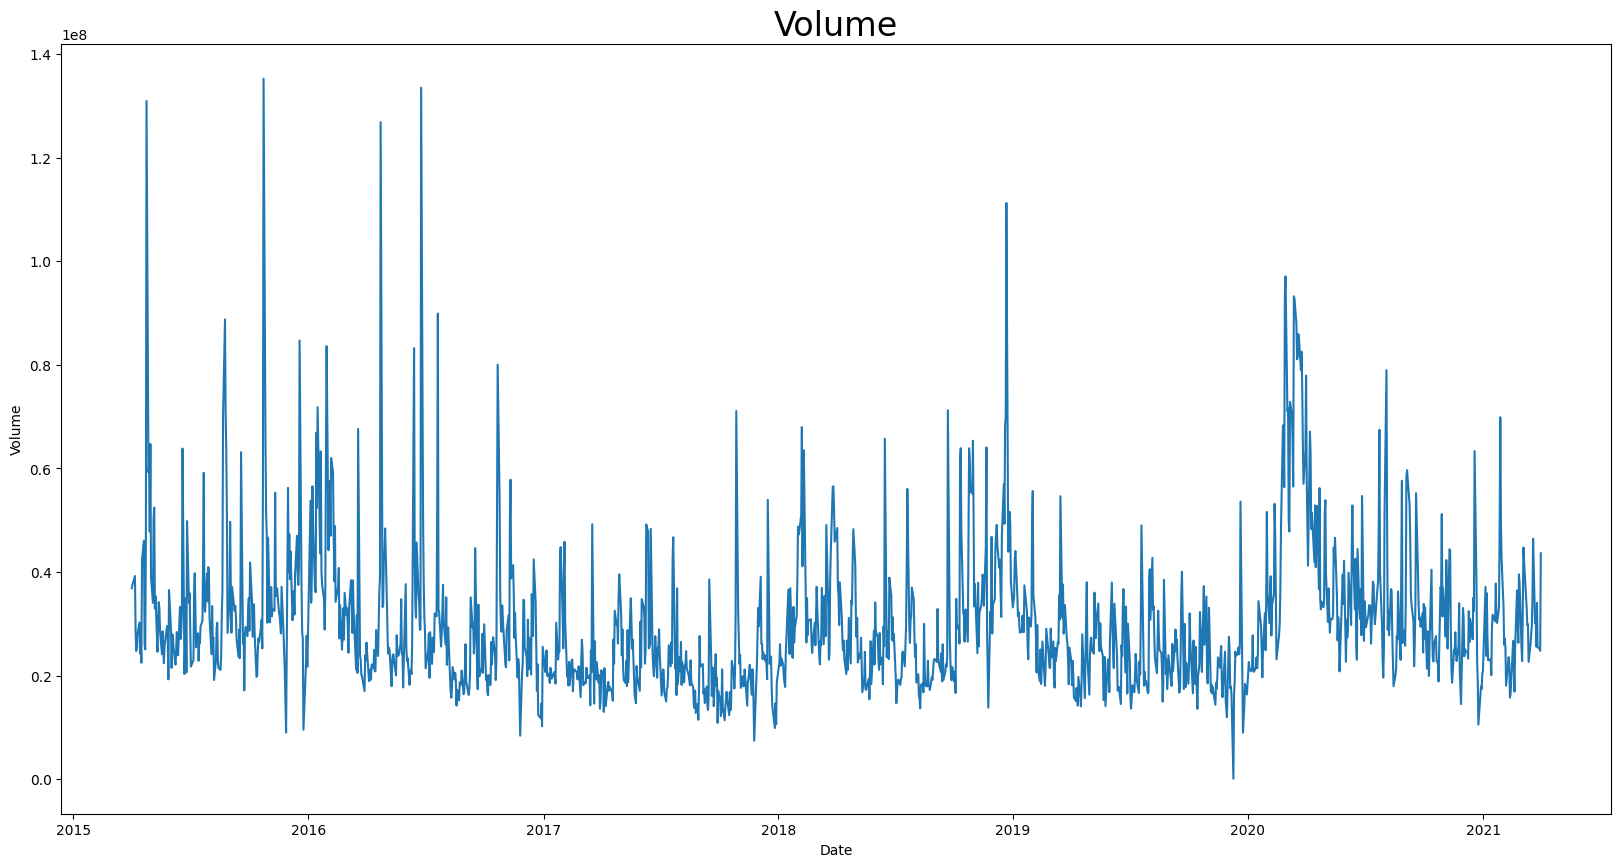

In [23]:
for col in data.columns:
    plt.figure(figsize=(20,10))
    sns.lineplot(x = data.index ,y = data[col],data = data)
    plt.title(col , fontsize=24)
    plt.show()

It**’s clear from the plots that there is an overall increase in the trend,with some seasonality in Volume plot**

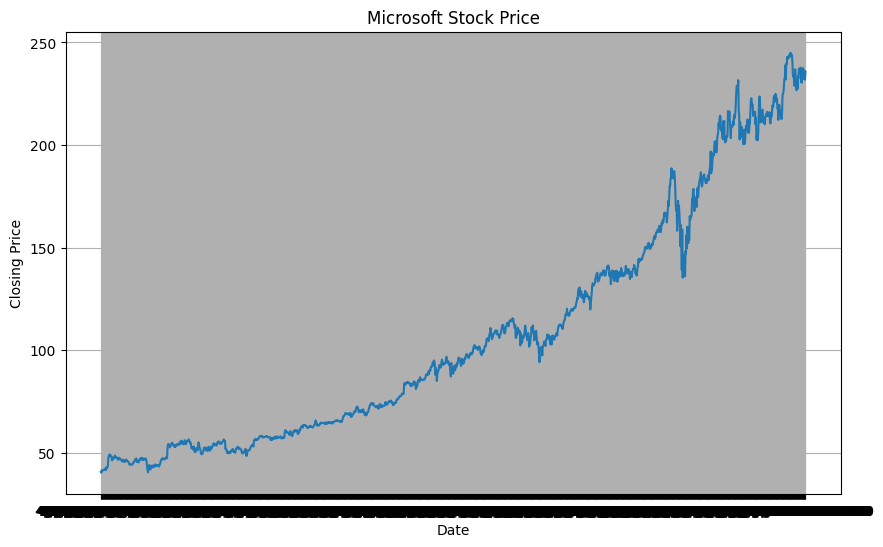

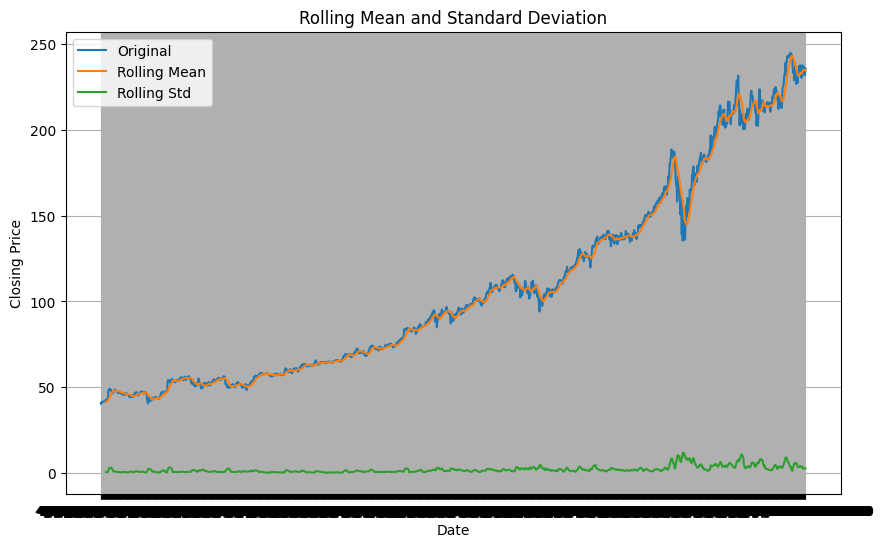

In [31]:
import matplotlib.pyplot as plt

# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'])
plt.title('Microsoft Stock Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Plot rolling statistics
rolling_mean = data['Close'].rolling(window=12).mean()
rolling_std = data['Close'].rolling(window=12).std()

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'], label='Original')
plt.plot(data['Date'], rolling_mean, label='Rolling Mean')
plt.plot(data['Date'], rolling_std, label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

# Further visualization steps as needed


# Stationary Check

In [32]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

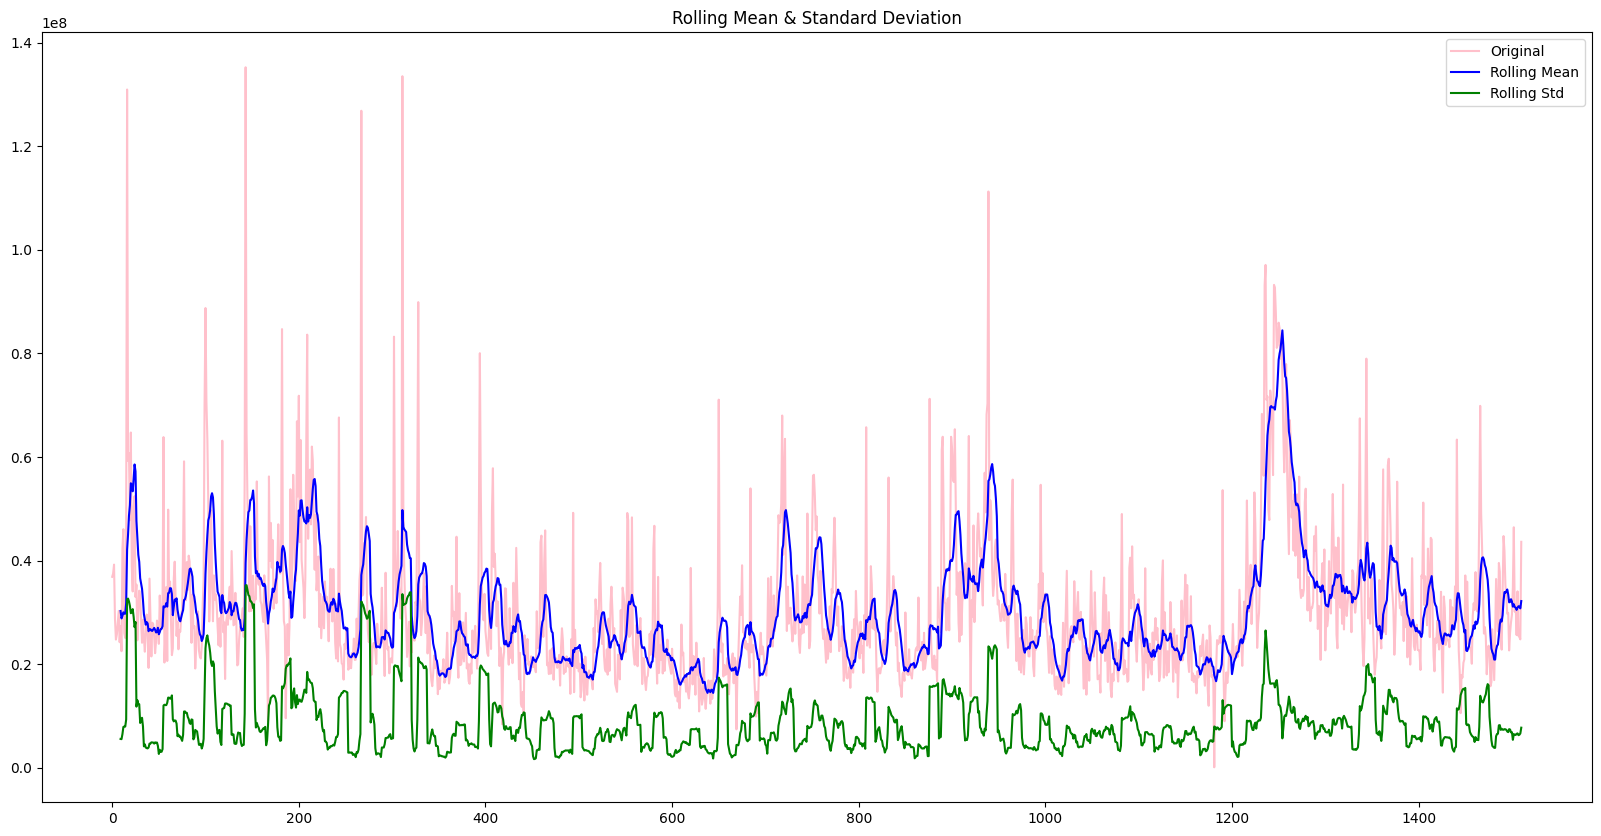

Results of Dickey-Fuller Test:
Test Statistic                -6.899656e+00
p-value                        1.291812e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.502000e+03
Critical Value (1%)           -3.434711e+00
Critical Value (5%)           -2.863466e+00
Critical Value (10%)          -2.567795e+00
dtype: float64


In [34]:
test_stationarity(data['Volume'])

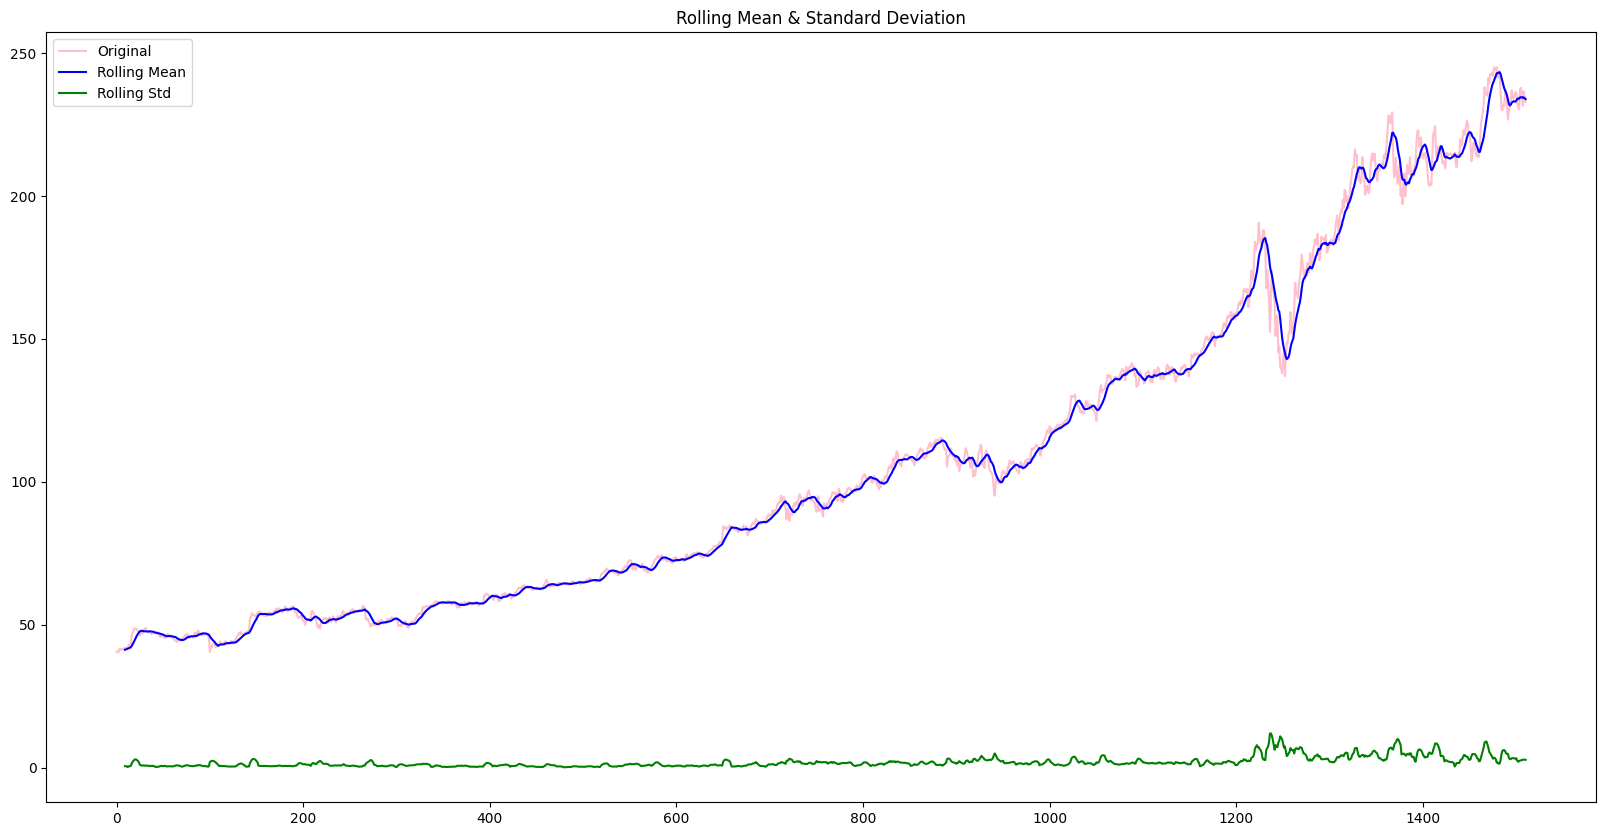

Results of Dickey-Fuller Test:
Test Statistic                    0.823915
p-value                           0.992013
#Lags Used                        2.000000
Number of Observations Used    1508.000000
Critical Value (1%)              -3.434694
Critical Value (5%)              -2.863459
Critical Value (10%)             -2.567791
dtype: float64


In [36]:
test_stationarity(data['Open'])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.

# Identifying patterns

# Autocorelation

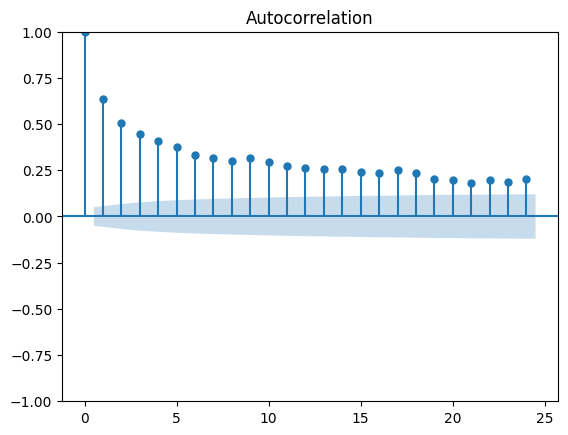

<Figure size 2000x1000 with 0 Axes>

In [45]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

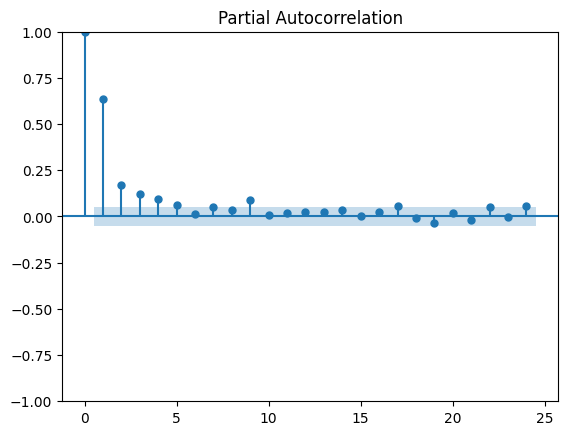

<Figure size 2000x1000 with 0 Axes>

In [46]:
tsaplots.plot_pacf(data['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

# Trend Analysis

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


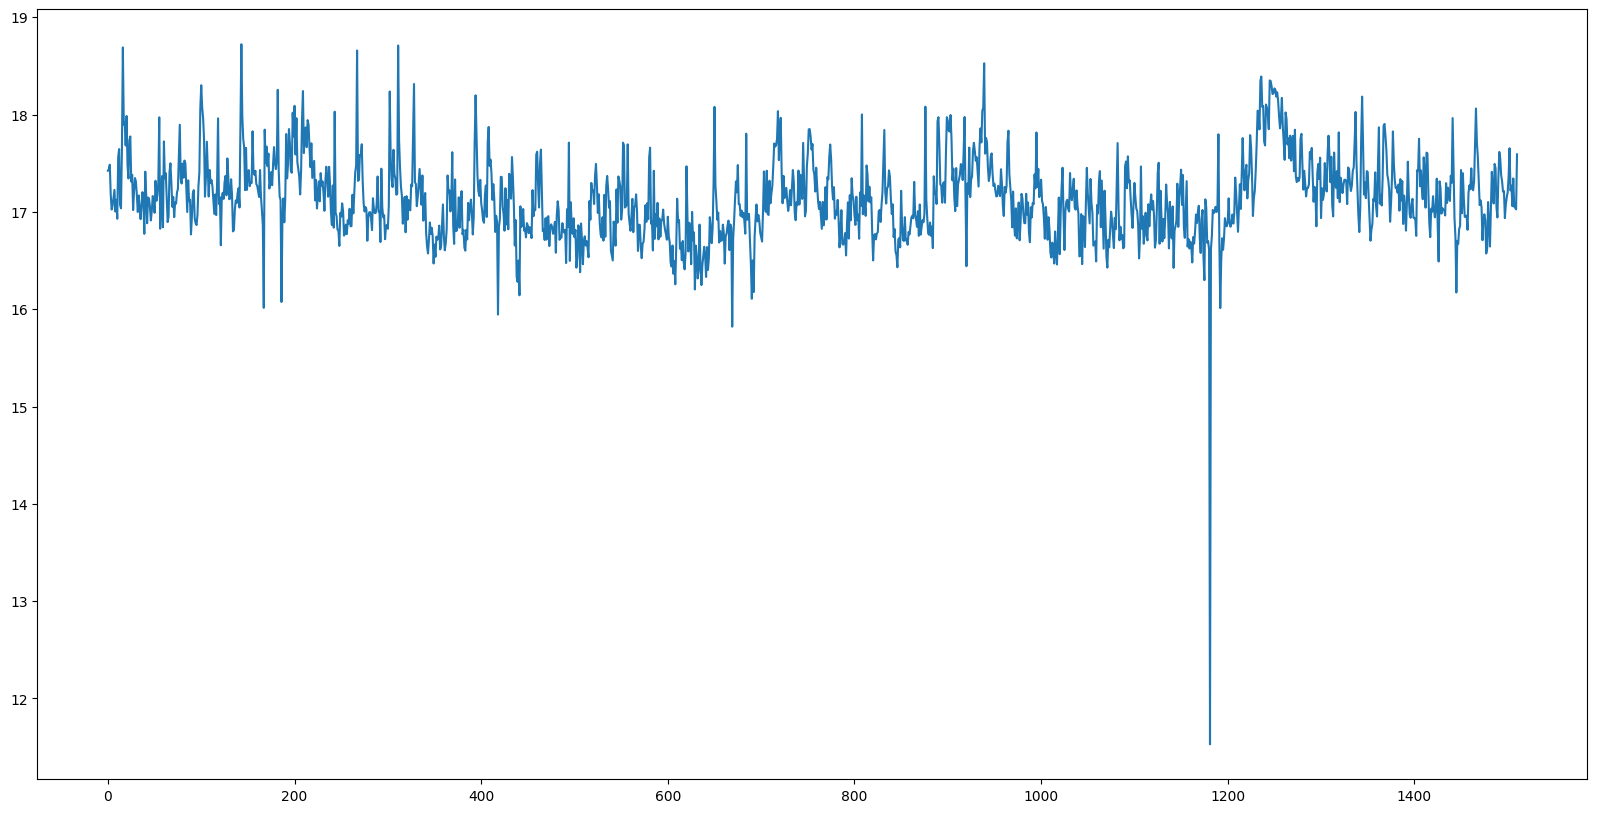

In [50]:
plt.figure(figsize=(20,10))
ts_log=np.log(data['Volume'])
plt.plot(ts_log)

# Seasonality (along with Trend)

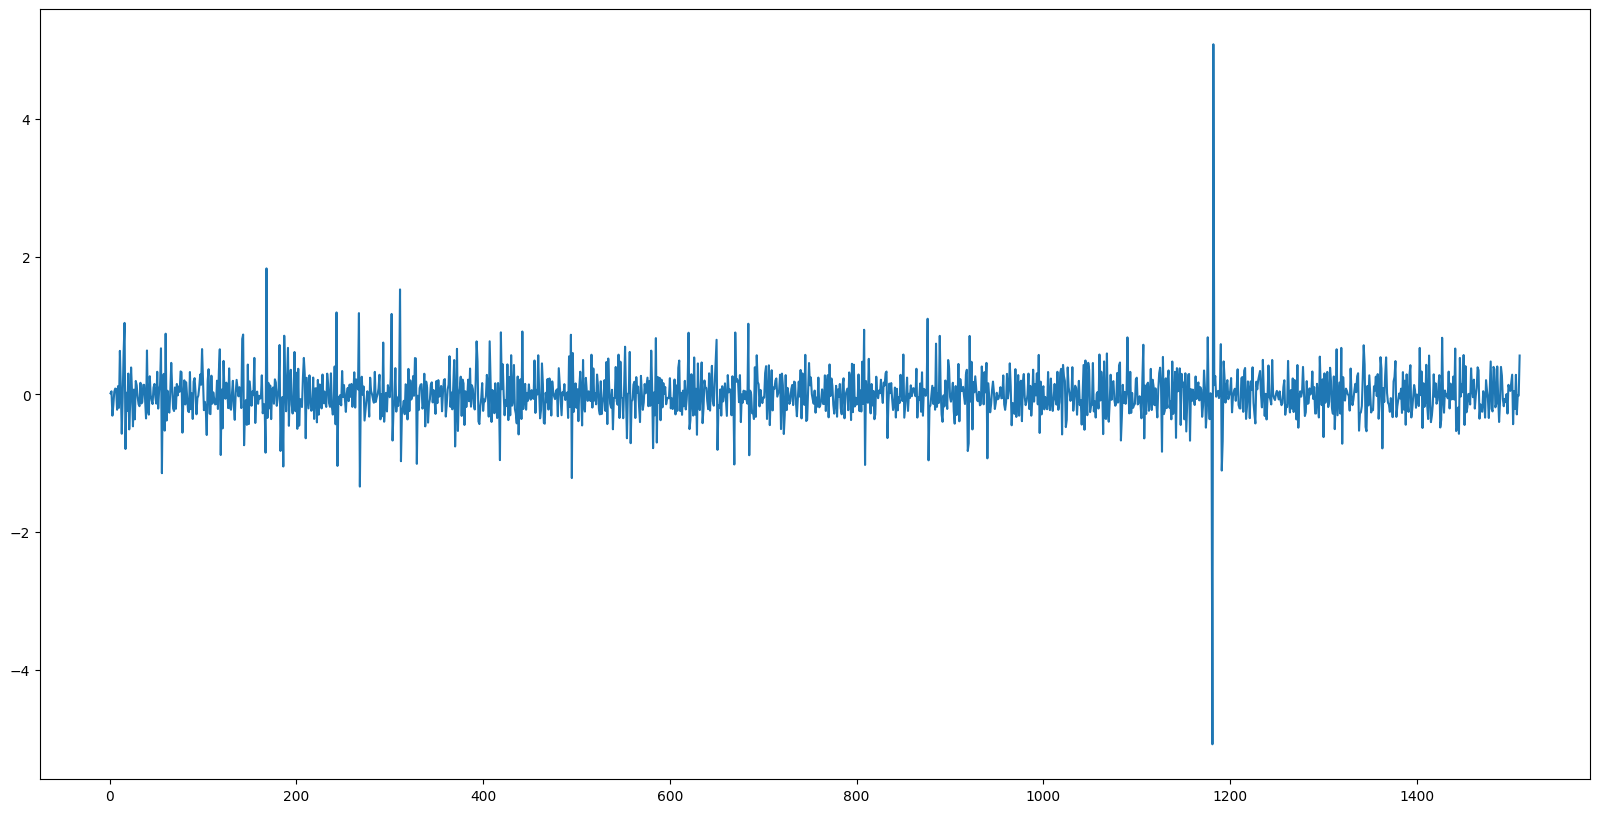

In [51]:
plt.figure(figsize=(20,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

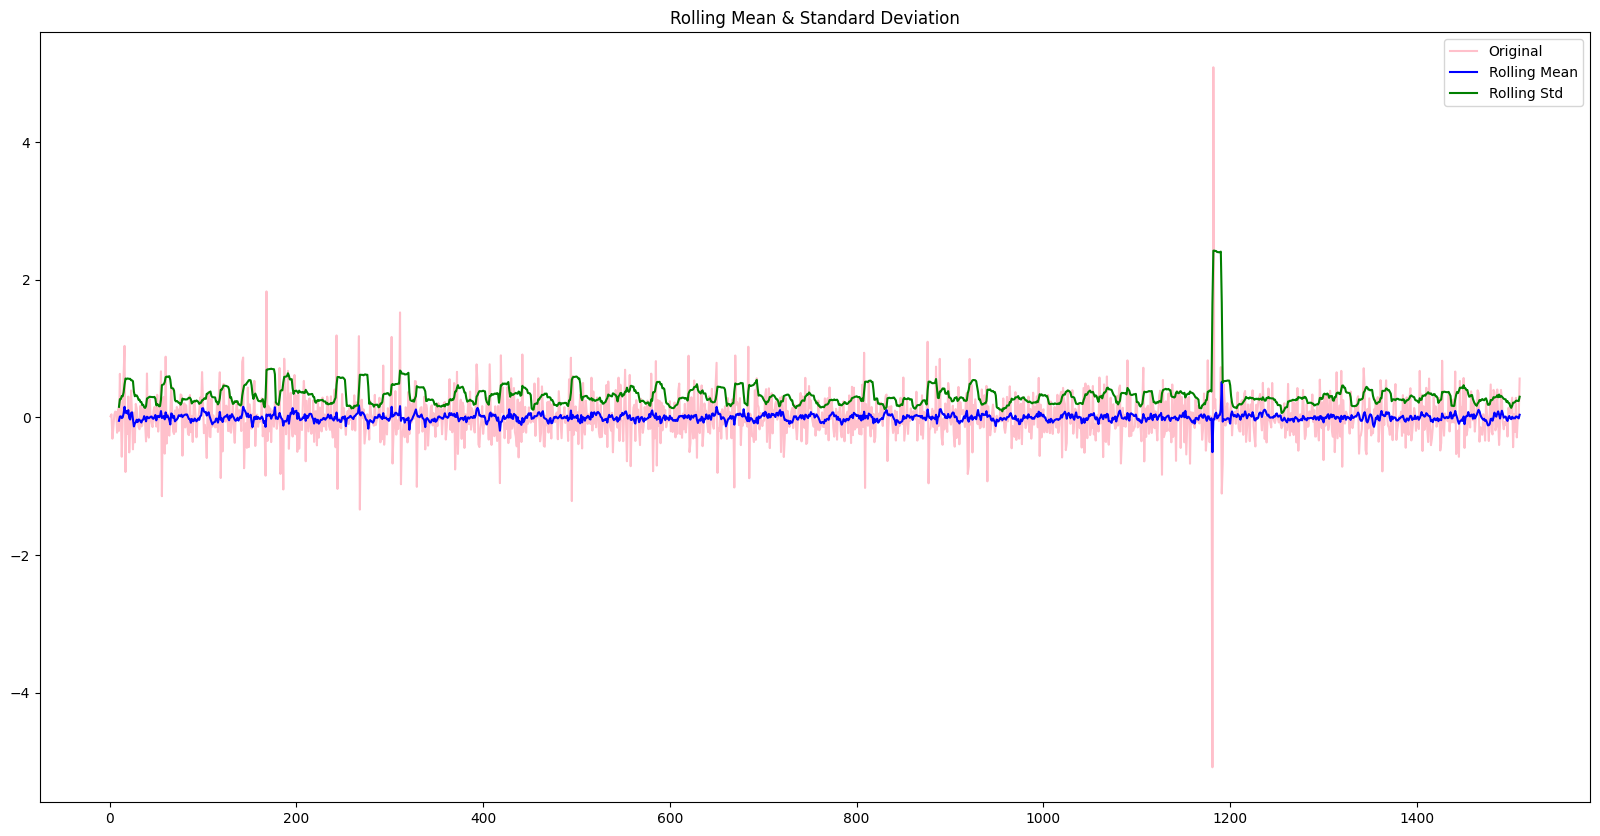

Results of Dickey-Fuller Test:
Test Statistic                -1.277553e+01
p-value                        7.608278e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64


In [52]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

# ARIMA

                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1511
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26585.774
Date:                Sat, 03 Jun 2023   AIC                          53179.547
Time:                        05:12:20   BIC                          53200.827
Sample:                             0   HQIC                         53187.472
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.060     10.362      0.000       0.503       0.738
ma.L1         -1.1367      0.065    -17.361      0.000      -1.265      -1.008
ma.L2          0.1874      0.055      3.384      0.0

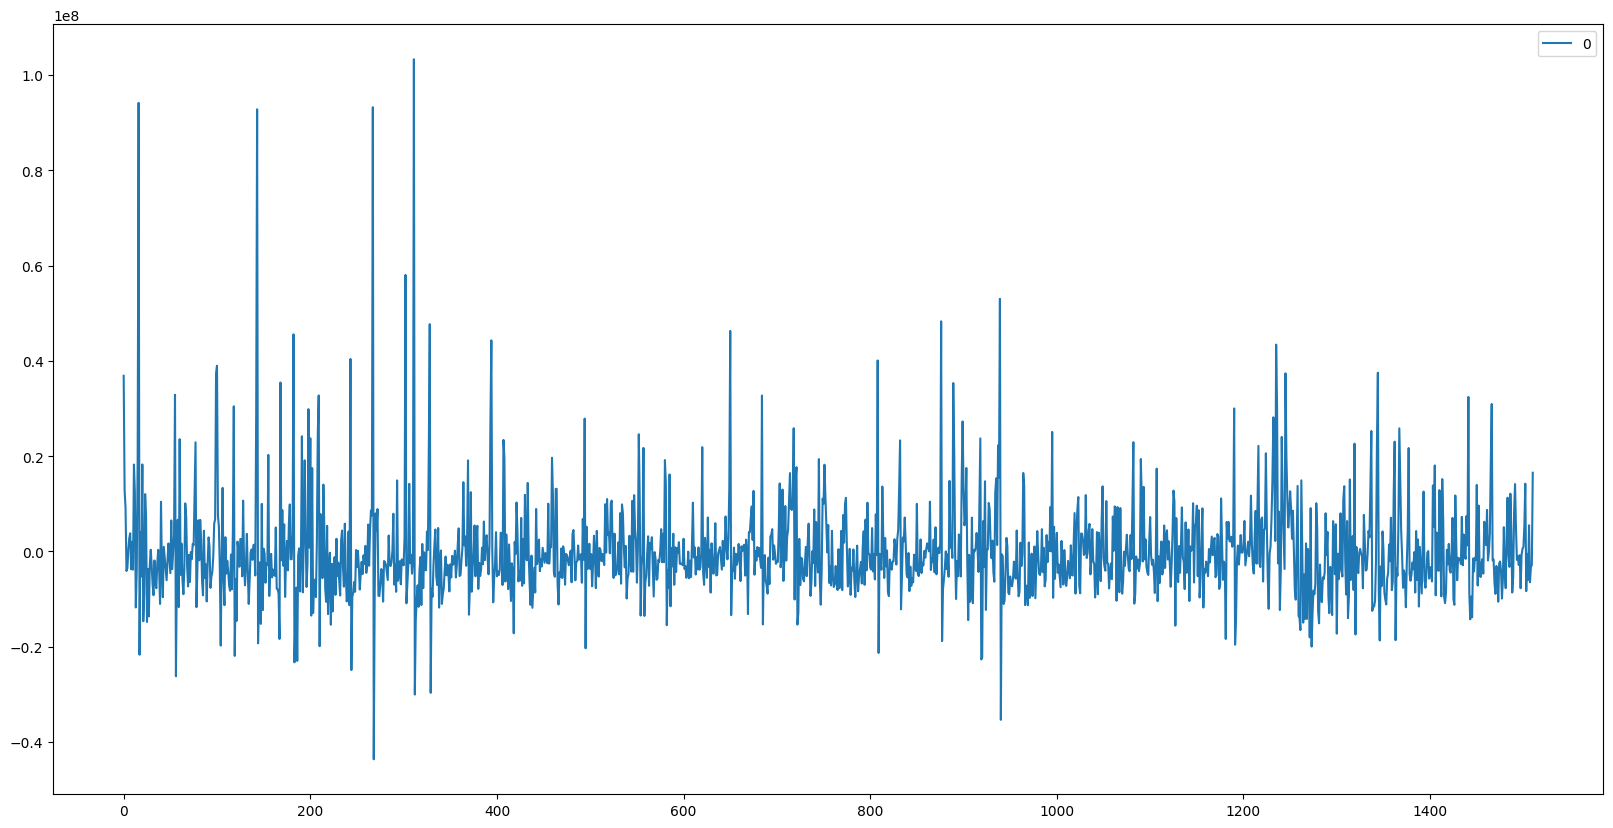

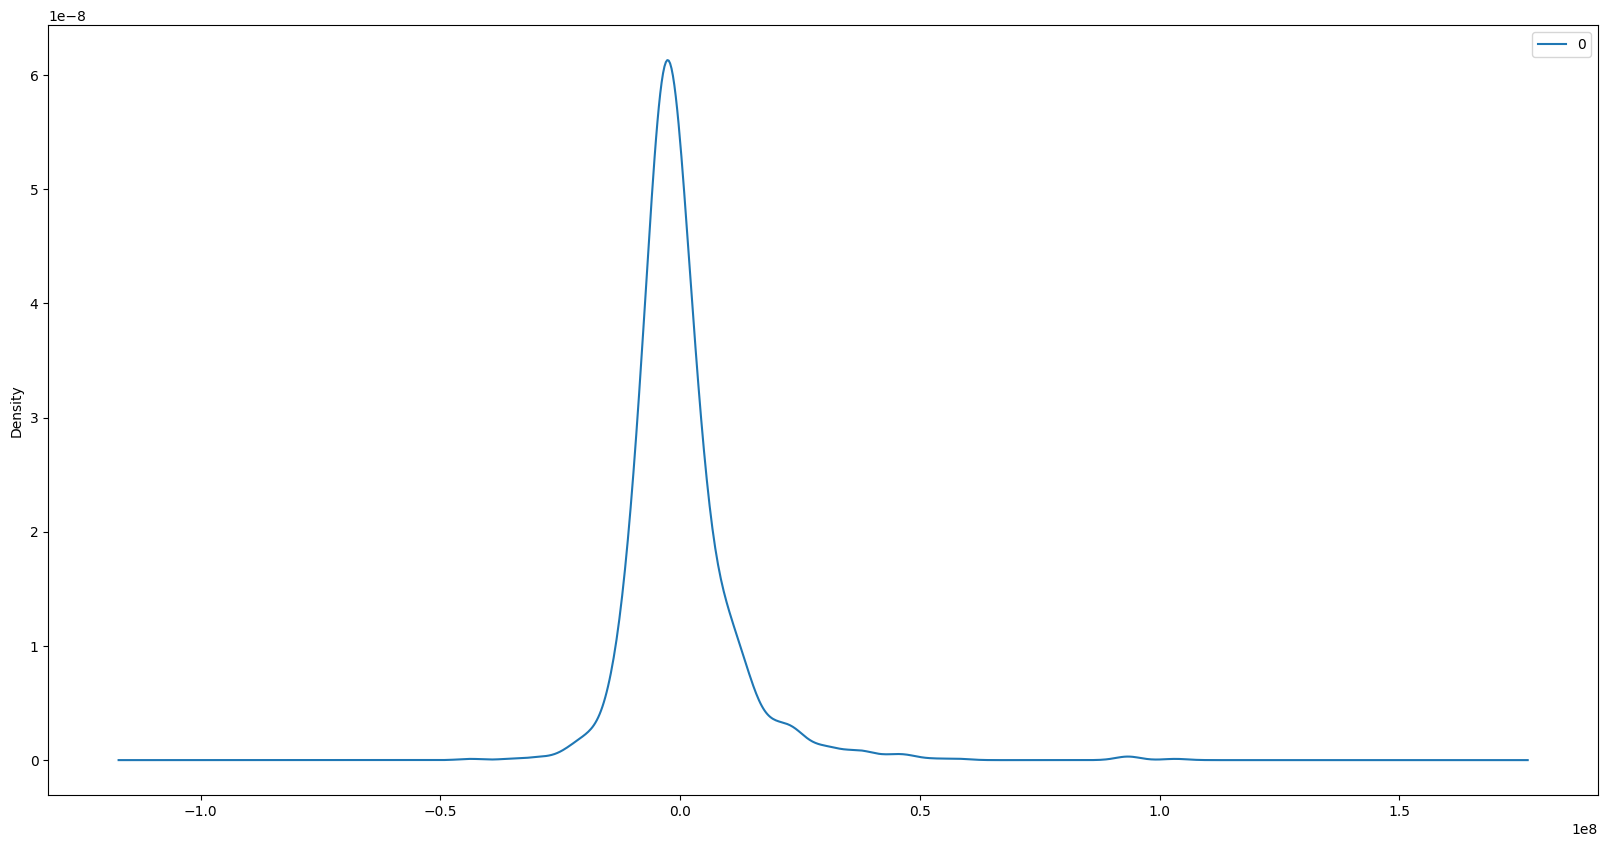

                  0
count  1.511000e+03
mean   5.605306e+04
std    1.075570e+07
min   -4.362672e+07
25%   -5.315694e+06
50%   -1.731173e+06
75%    3.282732e+06
max    1.032959e+08


In [54]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['Volume'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print (residuals.describe())

# Prediction

In [81]:
import pandas as pd

# Read the dataset and parse the 'Date' column as datetime
data = pd.read_csv('Microsoft_Stock.csv', parse_dates=['Date'], dayfirst=True)

# Prepare the data for ARIMA modeling
date_indexed_data = data.set_index('Date')
ts = date_indexed_data['Close']

# Split the data into training and testing sets
train_data = ts.iloc[:-30]  # Use all except the last 30 days for training
test_data = ts.iloc[-30:]   # Use the last 30 days for testing

# Model fitting
model = ARIMA(train_data, order=(1, 1, 1))  # Replace order=(p, d, q) with appropriate values
model_fit = model.fit()

# Make predictions
# Make predictions with date index
predictions = model_fit.get_forecast(steps=len(test_data))
predicted_values = predictions.predicted_mean

# Set the date index for the predicted values
predicted_values.index = test_data.index

# Print the predicted values
print("Predicted values:")
print(predicted_values)



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

Predicted values:
Date
2021-02-18 16:00:00    244.043202
2021-02-19 16:00:00    244.094902
2021-02-22 16:00:00    244.077855
2021-02-23 16:00:00    244.083476
2021-02-24 16:00:00    244.081623
2021-02-25 16:00:00    244.082234
2021-02-26 16:00:00    244.082032
2021-01-03 16:00:00    244.082099
2021-02-03 16:00:00    244.082077
2021-03-03 16:00:00    244.082084
2021-04-03 16:00:00    244.082082
2021-05-03 16:00:00    244.082082
2021-08-03 16:00:00    244.082082
2021-09-03 16:00:00    244.082082
2021-10-03 16:00:00    244.082082
2021-11-03 16:00:00    244.082082
2021-12-03 16:00:00    244.082082
2021-03-15 16:00:00    244.082082
2021-03-16 16:00:00    244.082082
2021-03-17 16:00:00    244.082082
2021-03-18 16:00:00    244.082082
2021-03-19 16:00:00    244.082082
2021-03-22 16:00:00    244.082082
2021-03-23 16:00:00    244.082082
2021-03-24 16:00:00    244.082082
2021-03-25 16:00:00    244.082082
2021-03-26 16:00:00    244.082082
2021-03-29 16:00:00    244.082082
2021-03-30 16:00:00    24

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


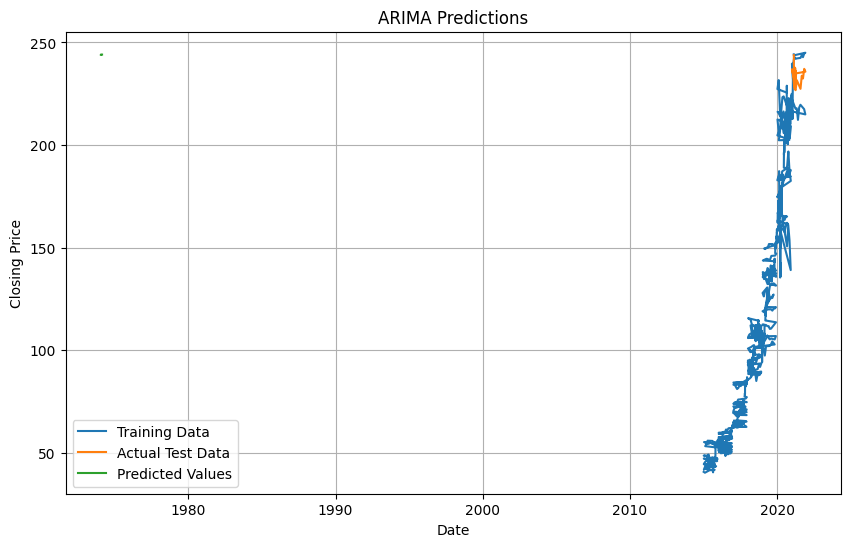

In [82]:
import matplotlib.pyplot as plt

# Plot actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(predictions.predicted_mean.index, predictions.predicted_mean, label='Predicted Values')
plt.title('ARIMA Predictions')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


<h2> Text Analytics - CS4 </h2>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import csv
from tqdm import tqdm
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plots = []

with open("plot_summaries.txt", 'r') as f:
       reader = csv.reader(f, dialect='excel-tab') 
       for row in tqdm(reader):
            plots.append(row)

In [ ]:
plot = []

# extract plot summaries
for i in tqdm(plots):
  plot.append(i[1])

# create dataframe
df = pd.DataFrame({'plot': plot})

In [ ]:
df

In [ ]:
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [ ]:
df['clean_plot'] = df['plot'].apply(lambda x: clean_text(x))

<h4>Removal of stop words</h4>

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

df['clean_plot'] = df['clean_plot'].apply(lambda x: remove_stopwords(x))

In [ ]:
df

<h4>Frequency of words after removing stop words and cleaning the text</h4>

In [ ]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
   
  d = words_df.nlargest(columns="count", n = terms) 
  
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
freq_words(df['clean_plot'], 100)

<h4>Word Cloud</h4>

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None, min_font_size=10).generate(str(df['clean_plot']))

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

<h4>Topic Modeling</h4>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_matrix = CountVectorizer().fit_transform(df['clean_plot'])

In [ ]:
bow_matrix

<h4>Word Count</h4>

In [ ]:
df['word_count'] = df['clean_plot'].apply(lambda x: len(str(x).split(" ")))

df[['clean_plot','word_count']]